Author: Nora Duffy
Professor: Uhe
Class: IS 445
Semester: Spring 2024
Project: Final

Dataset is from Kaggle, licensed under CC0: Public Domain. This means the creator waived all of their rights to the work, and the dataset can be copied, modified, and distributed without asking permission. The link to the dataset is below:

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

In [45]:
df = pd.read_csv('titles.csv')
#I am checking the size of the dataset
df.shape[0]

5850

In [49]:
#I am checking the first few entries
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


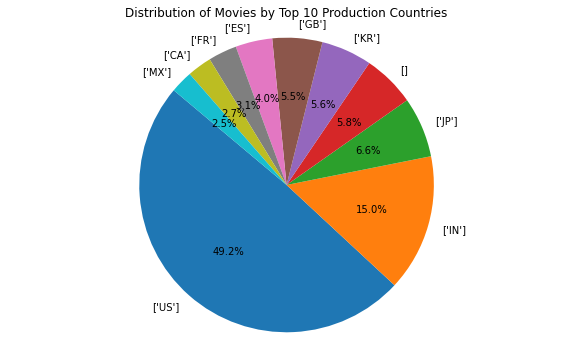

In [50]:
# Explode the lists in the 'production_countries' column into separate rows
df_exploded = df.explode('production_countries')

# Group by the individual production countries and count the occurrences
countries = df_exploded.groupby('production_countries').size().reset_index(name='count')

# Sort the DataFrame by count of movies and select the top 10
top_countries = countries.nlargest(10, 'count')

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_countries['count'], labels=top_countries['production_countries'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Movies by Top 10 Production Countries')
plt.show()

The Pie Chart above shows how many films are produced in different countries. As you can see, the United States produces the most films on Netflix, followed by India, then Japan. This shows the top 10 countries that produce movies on Netflix, but there are many others that also produce movies and shows.

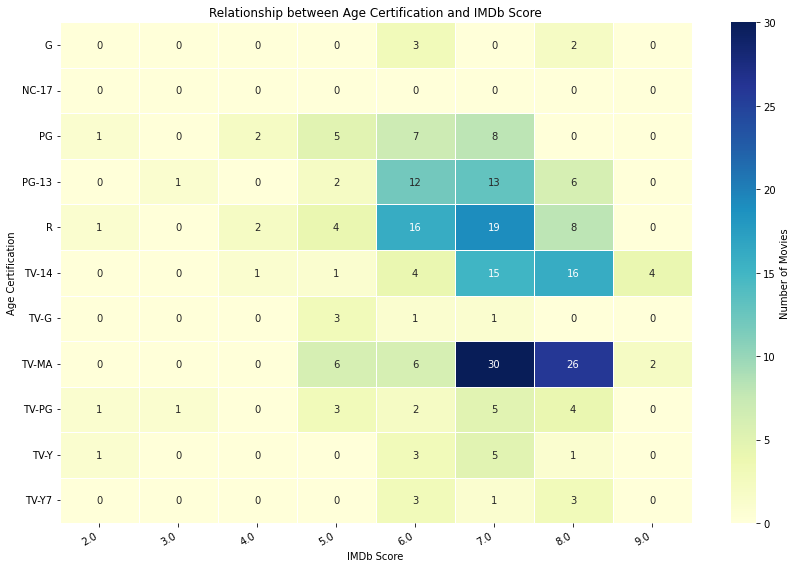

In [51]:
cert_rating_counts = df.groupby(['age_certification', 'imdb_score']).size().unstack(fill_value=0)

# Define the order of IMDb scores
score_order = sorted(df['imdb_score'].unique())

# Filter the IMDb score order to include only every 1.0 interval and handle NaN values
score_order_filtered = [score for score in score_order if not np.isnan(score) and (score % 1 == 0 or score == int(score))]

# Grouping the data by 'age_certification' and 'imdb_score' and counting the occurrences
cert_score_counts = df.groupby(['age_certification', 'imdb_score']).size().unstack(fill_value=0)

# Filter the columns of the DataFrame to include only the IMDb scores present in score_order_filtered
cert_score_counts = cert_score_counts[score_order_filtered]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cert_score_counts, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5, 
            cbar_kws={'label': 'Number of Movies'}, 
            xticklabels=score_order_filtered)  # specifying the filtered x-axis labels
plt.title('Relationship between Age Certification and IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Age Certification')
plt.xticks(rotation=30, ha='right')  # Adjusting rotation and alignment
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap above shows the relationship between a movie's age certification (rating) and imdb score. You can see there are many TV-MA movies and shows that are rated 7 and 8. There are not as strong of relatioinships among other ratings and imdb scores, but most are around a rating between 6 and 8.